In [43]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Steps

* Creating Info objects
* Creating Raw objects
* Creating Epochs objects (not necessary)
* Creating Evoked Objects (not necessary)

# Creating Info objects

In [4]:
# Names for each channel
channel_names = [ 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4' ]

# The type (mag, grad, eeg, eog, misc, ...) of each channel
channel_types = [ 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg' ]

# The sampling rate of the recording
# https://www.emotiv.com/comparison/ (128 SPS or 256 SPS)
sfreq = 128  # in Hertz

# The EEG channels use the standard naming strategy.
# By supplying the 'montage' parameter, approximate locations will be added for them
montage = 'standard_1005'

# Initialize required fields
info = mne.create_info(channel_names, sfreq, channel_types, montage)

# Add some more information
info['description'] = 'Emotiv EPOC+ dataset obtainer from Cortex API'

# Names of bad channels
# info['bads'] = ['Pz']  

print(info)

DigMontage is a superset of info. 329 in DigMontage will be ignored. The ignored channels are: {'F5h', 'P3', 'C3', 'CCP1', 'P9', 'CP3h', 'FCCz', 'TPP8h', 'CCP4h', 'Fz', 'FT9', 'FFC6h', 'FT9h', 'AFp10', 'F4h', 'P4', 'FFC5h', 'CPP5', 'AFp4h', 'CPP1', 'CP4h', 'C4', 'FC2h', 'PPO5h', 'CP1', 'PPO2h', 'FC1h', 'C1', 'POO10', 'A2', 'Iz', 'F1', 'P8h', 'PPO8', 'FFC4', 'AF8h', 'Fp2', 'CP6', 'POO1', 'C2', 'FFC3', 'FFCz', 'AFp2h', 'P4h', 'C6h', 'FT8', 'AFF10h', 'F5', 'PO8', 'A1', 'FC6h', 'FTT8', 'FFC1', 'POO8', 'CCP6h', 'FT8h', 'CP6h', 'C6', 'Fp2h', 'AF3h', 'AF2h', 'FCC1h', 'AFF2', 'AFF4', 'POO1h', 'P2', 'FFT10', 'FCC2', 'AFp9h', 'FFC4h', 'FFT10h', 'C3h', 'AFFz', 'CPPz', 'AFp5h', 'PO2h', 'AFF3h', 'POO6', 'TP10', 'F6', 'P3h', 'POO5h', 'F7h', 'AFp1', 'P1h', 'PPO3', 'FTT7h', 'T3', 'PPO1', 'PO3', 'P9h', 'TP10h', 'T10', 'P6', 'T8h', 'OI2h', 'Fp1h', 'CCP5', 'TPP7h', 'AFF9', 'FT7', 'AFF6h', 'PPO4', 'FC4', 'TPP9', 'P7h', 'FTT8h', 'PO6', 'TTP8h', 'CPP4', 'CCP3h', 'FTT10', 'PO5h', 'PPO7h', 'TTP7h', 'FFC6', 'F

In [69]:
import asyncio

async def get_data():
    arr = np.random.randint(1000, size = 14)
    arr = arr / 100000000 * 4
    return arr

async def generate_trial():
    freq = 0.0078125 # sleep every sec
    sps = int(1 / freq) # must be 128
    seconds = 8 # graz protocol trial duration
    trial = await get_data()
    trial = np.reshape(trial, (14,-1))  

    for i in range(0, int(seconds * sps)):
        # await asyncio.sleep(freq)
        temp_data = await get_data()
        trial = np.insert(trial, i + 1, temp_data, axis=1)

    print("8 seconds has passed, saving...")
    print("Samples: ", len(trial))
    print("Shape: ", trial.shape)
    return trial


# loop = asyncio.get_event_loop()
# loop.create_task(generate_trial())

trial = await generate_trial()
trial

8 seconds has passed, saving...
Samples:  14
Shape:  (14, 1025)


array([[3.292e-05, 4.400e-06, 3.080e-05, ..., 2.776e-05, 2.080e-05,
        5.840e-06],
       [2.928e-05, 8.400e-07, 1.416e-05, ..., 8.440e-06, 3.948e-05,
        1.548e-05],
       [1.188e-05, 2.080e-05, 4.480e-06, ..., 3.228e-05, 3.356e-05,
        3.420e-05],
       ...,
       [2.444e-05, 4.320e-06, 3.800e-06, ..., 2.656e-05, 9.200e-07,
        3.880e-06],
       [1.436e-05, 3.828e-05, 1.680e-06, ..., 1.172e-05, 1.792e-05,
        1.932e-05],
       [1.272e-05, 1.480e-05, 3.148e-05, ..., 3.632e-05, 4.640e-06,
        1.552e-05]])

# Creating Raw objects

In [18]:
data = np.random.randn(5, 1000)
data.shape

(5, 1000)

In [70]:
custom_raw = mne.io.RawArray(trial, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=14, n_times=1025
    Range : 0 ... 1024 =      0.000 ...     8.000 secs
Ready.
<RawArray  |  None, n_channels x n_times : 14 x 1025 (8.0 sec), ~155 kB, data loaded>


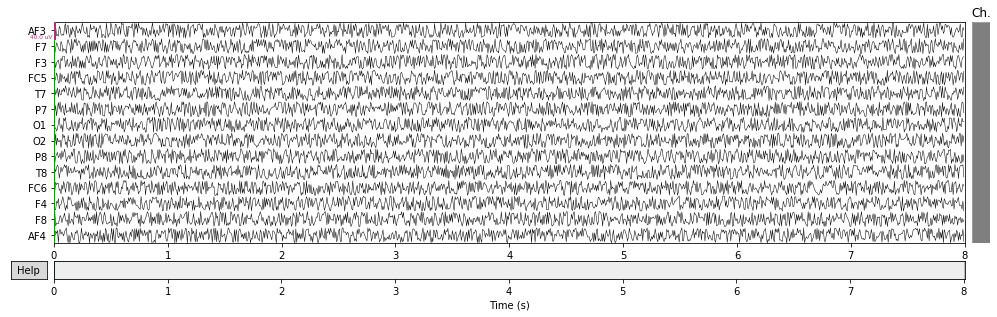

In [71]:
custom_raw.plot()
plt.show()

In [72]:
for i in range(1, 31):
    file = "mcegal" + "_" + str(i) + "_" + "raw.fif" 
    custom_raw.save(file)

Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_1_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_1_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_2_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_2_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_3_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_3_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_4_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_4_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_5_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_5_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_6_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_6_raw.fif [done]
Writing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_7_raw.fif
Closing C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_7_raw.fif [done]
Writing C:\Users\lesch\Desk

Opening raw data file C:\Users\lesch\Desktop\CSP-WS-API\cortex\mcegal_4_raw.fif...
    Range : 0 ... 1024 =      0.000 ...     8.000 secs
Ready.
Reading 0 ... 1024  =      0.000 ...     8.000 secs...


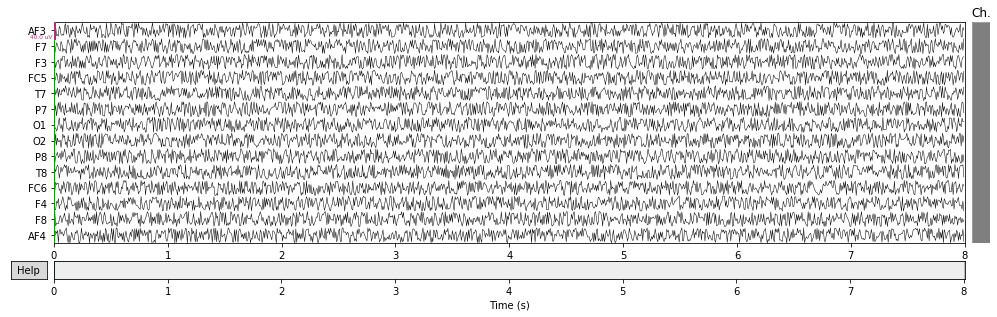

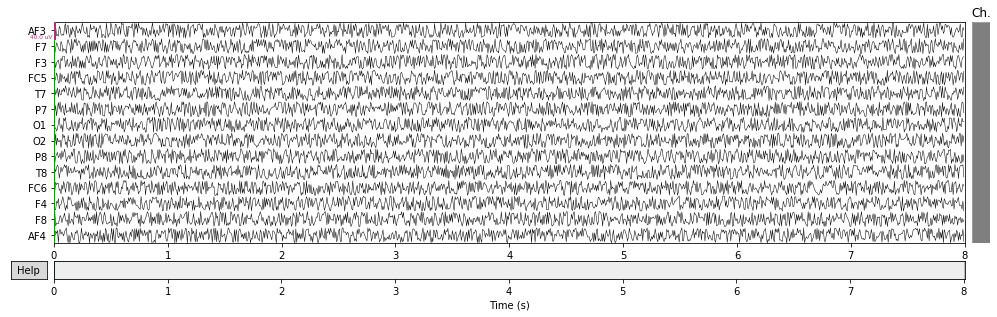

In [73]:
import os

fif_path = os.path.join(os.getcwd(), "mcegal_4_raw.fif")
raw = mne.io.read_raw_fif(fif_path)
raw.load_data()

raw.plot()